In [142]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import copy

In [45]:
# Convert TIF base to PNG
base_dir_path = "data/dataset/base_tif"
base_dir_files = os.listdir(base_dir_path)
base_dir_files.sort(reverse=True)

save_path = "data/dataset/base_png"

for file in base_dir_files:
    file_path = os.path.join(base_dir_path, file)
    base_img = Image.open(file_path)
    base_img.save(os.path.join(save_path, file[:-4] + '.png'))

In [116]:
base_img_size = (512, 512)
base_dir_path = "data/dataset/base_png"
base_dir_files = os.listdir(base_dir_path)
base_dir_files.sort(reverse=True)

init_base_imgs = True
for file in base_dir_files:
    file_path = os.path.join(base_dir_path, file)
    base_img = Image.open(file_path)
    base_img = np.array(base_img, dtype='uint8')
    base_Img = Image.fromarray
    if base_img.size != base_img_size:
        base_img = base_img.resize(base_img_size)

    if init_base_imgs:
        base_imgs = [base_img]
        init_base_imgs = False
    else:
        base_imgs.append(base_img)


In [143]:

import PIL.ImageOps

class Negative(object):
    def __init__(self):
        pass
    
    def __call__(self, img):
        return PIL.ImageOps.invert(img)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

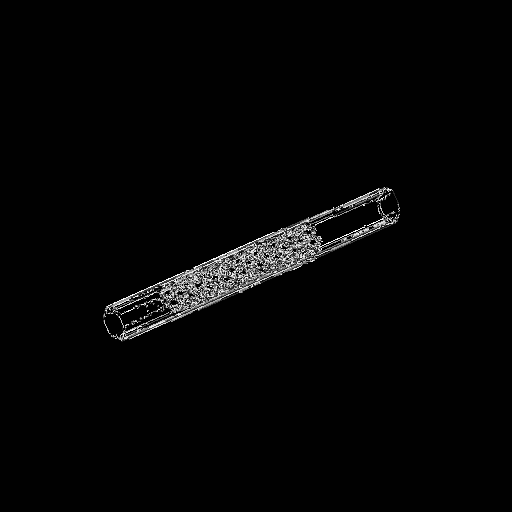

In [148]:
# Set up data augmentation transforms
transform = transforms.Compose([
    transforms.RandomResizedCrop(size=base_img_size, scale=(0.8, 1.0), ratio=(1.0, 1.0)),
    transforms.RandomRotation(degrees=180, fill=2**16 - 1),
    transforms.ToTensor(),
    #Negative(),
    AddGaussianNoise(mean=0, std=0.0)

]) 

# For each image, create 'augmentation_factor' images with the transforms
augmentation_factor = 10

transformed_img = transform(base_imgs[0])

display(transforms.ToPILImage()(transformed_img))
for base_img in base_imgs:
    break
    for i in range(0, augmentation_factor):    

        transformed_img = transform(base_imgs[i])

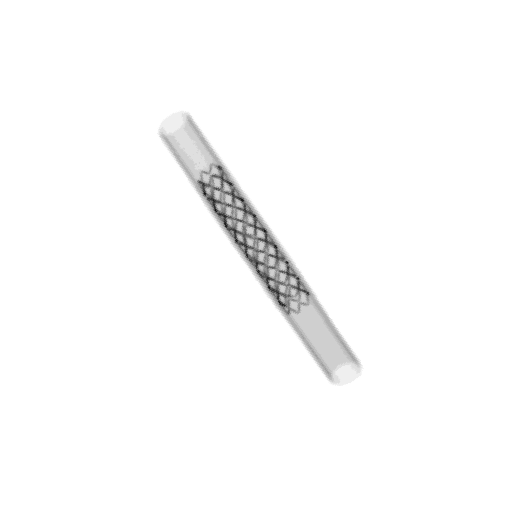